In [81]:
import pandas as pd
import simpy
import statistics as st
import matplotlib.pyplot as plt
import math as m

In [82]:
base_dados = pd.read_csv("DoaçãoRim.csv", sep=",")

## Mantendo apenas os dados que serão utilizados 

In [83]:
base_dados = base_dados.drop(columns=["age_cat","time_on_Dialysis","date_acutal","Time_death","Transplant_Y_N","X36MthsTx","Time_Tx","event","razon_removed"])

base_dados.head()

,date,age_at_list_registration,prior_transplant,number_prior_transplant,patient_still_on_list,death,Transplant,removed_list,time
0,29/06/2017,67,Não,0,Sim,Não,Não,Não,392
1,03/11/2008,58,Não,0,Não,Sim,Óbito Lista,Não,2066
2,13/07/2010,51,Não,0,Não,Não,Não,Sim,365
3,03/10/2011,52,Sim,1,Não,Não,Não,Sim,365
4,05/07/2006,67,Não,0,Não,Sim,Óbito Lista,Não,194


In [89]:
# Adiciona um id para cada paciente
base_dados['Id'] = base_dados.reset_index().rename(columns={'index': 'ID'})['ID']
base_dados['number_prior_transplant'] = base_dados['number_prior_transplant'].replace({0: 1, 1: 0})
base_dados.head()
prioridade = base_dados['number_prior_transplant']
idPaciente = base_dados['Id']
tempo = base_dados['time']

def passandoLista(coluna):
    lista = []

    for item in coluna:
        lista.append(int(item))
        
    return lista

dataChegada100 = dataChegada[:100]
idPaciente100 = idPaciente[:100]
tempo100 = tempo[:100]
prioridade100 = prioridade[:100]
transplanteOcorreu100 = transplanteOcorreu[:100]
print(prioridade)

19779    1
1333     0
15146    1
24674    1
7886     1
        ..
47829    1
45832    1
39385    1
26204    1
37136    0
Name: number_prior_transplant, Length: 48153, dtype: int64


# Ordenando base de dados em linha do tempo crescente com recorte temporal para 2016

In [90]:
base_dados['date'] = pd.to_datetime(base_dados['date'], dayfirst=True)
base_dados = base_dados.sort_values('date')
base_dados['chegada'] = (base_dados['date'] - dados_filtrados['date'].min()).dt.days
base_dados['final_date'] = base_dados['date'] + pd.to_timedelta(base_dados['time'], unit='D')

number_of_transplants_per_year = []

currentYear = 2000
for i in range(17):
    dados_filtrados = base_dados.loc[(base_dados['final_date'].dt.year == currentYear) & (base_dados['Transplant'] == 'Sim')]
    try:
        contagem_sim_condicional = dados_filtrados['Transplant'].value_counts()['Sim']
        number_of_transplants_per_year.append(contagem_sim_condicional)
        print("Número de transplantes ocorridos em ", currentYear, ": ", contagem_sim_condicional)
    except:
        contagem_sim_condicional = 0
        print("Não houveram transplantes no ano", currentYear)
    currentYear = currentYear + 1

dados_filtrados = base_dados[base_dados['date'].dt.year == 2016]
print("Array total com numero de transplants por ano:", number_of_transplants_per_year)

display(dados_filtrados)


Não houveram transplantes no ano 2000
Número de transplantes ocorridos em  2001 :  30
Número de transplantes ocorridos em  2002 :  99
Número de transplantes ocorridos em  2003 :  227
Número de transplantes ocorridos em  2004 :  325
Número de transplantes ocorridos em  2005 :  283
Número de transplantes ocorridos em  2006 :  306
Número de transplantes ocorridos em  2007 :  359
Número de transplantes ocorridos em  2008 :  528
Número de transplantes ocorridos em  2009 :  744
Número de transplantes ocorridos em  2010 :  1111
Número de transplantes ocorridos em  2011 :  1112
Número de transplantes ocorridos em  2012 :  1202
Número de transplantes ocorridos em  2013 :  1233
Número de transplantes ocorridos em  2014 :  1357
Número de transplantes ocorridos em  2015 :  1372
Número de transplantes ocorridos em  2016 :  1348
Array total com numero de transplants por ano: [30, 99, 227, 325, 283, 306, 359, 528, 744, 1111, 1112, 1202, 1233, 1357, 1372, 1348]


,date,age_at_list_registration,prior_transplant,number_prior_transplant,patient_still_on_list,death,Transplant,removed_list,time,Id,chegada,final_date
28029,2016-01-02,73,Não,1,Sim,Não,Não,Não,936,197,0,2018-07-26
39363,2016-01-02,50,Não,1,Sim,Não,Não,Não,936,38980,0,2018-07-26
41412,2016-01-02,64,Não,1,Não,Sim,Óbito Lista,Não,569,19447,0,2017-07-24
26760,2016-01-02,38,Não,1,Não,Não,Sim,Não,193,33838,0,2016-07-13
34213,2016-01-02,72,Não,1,Não,Não,Não,Sim,794,25863,0,2018-03-06
...,...,...,...,...,...,...,...,...,...,...,...,...
40481,2016-12-28,75,Não,1,Sim,Não,Não,Não,575,30053,361,2018-07-26
22486,2016-12-28,53,Sim,0,Sim,Não,Não,Não,575,8694,361,2018-07-26
31886,2016-12-28,68,Sim,0,Não,Sim,Óbito Lista,Não,269,19786,361,2017-09-23
45088,2016-12-29,1,Não,1,Sim,Não,Não,Não,574,44661,362,2018-07-26


### Tratamento de dados removendo outliers para visualizar tempo médio de espera 

1084.2708034805723


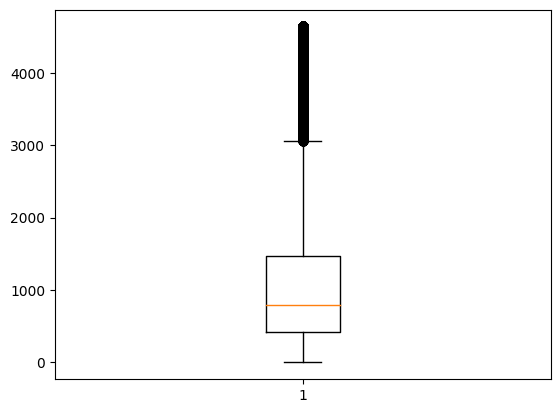

In [86]:
time_in_days = base_dados['time']

a = st.quantiles(time_in_days)[2]-st.quantiles(time_in_days)[0]
piso = st.quantiles(time_in_days)[0] - 3*a
teto = st.quantiles(time_in_days)[2] + 3*a
base_dados_sem_outliers_time = base_dados
base_dados_sem_outliers_time['time'] = base_dados['time'].clip(lower=piso, upper=teto)

plt.boxplot(base_dados_sem_outliers_time['time']);
print(st.mean(base_dados_sem_outliers_time['time']))

### Histograma

16.45265705323073
16
289.875


<function matplotlib.pyplot.show(close=None, block=None)>

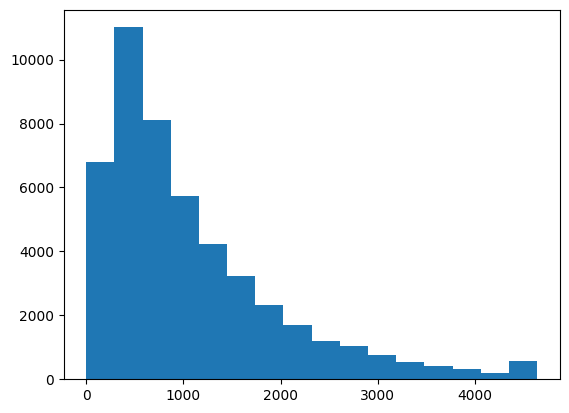

In [87]:
#k é o número de classes
#h é o histograma

time_in_days = base_dados_sem_outliers_time['time']

a = 1 + 3.3*m.log10(len(time_in_days))
k = round(a)
h = (max(time_in_days) - min(time_in_days))/k

print(a)
print(k)
print(h)

plt.hist(time_in_days, bins=k)
plt.show

In [93]:
#Simulação com tempo médio para transplante

def fila(env, recurso, paciente, chegada, saiuFila, prioridade, saida):
    yield env.timeout(chegada)

    with recurso.request(priority=prioridade) as req:
        yield req
        print("Paciente:", paciente, 'entrou na fila em', env.now)
        yield env.timeout(saida)
        if saiuFila:
            print("Paciente:", paciente, "saiu (morte ou desistência) da fila em", env.now)
        else:    
            print("Paciente:", paciente, 'foi transplantado em', env.now)

env = simpy.Environment()
recurso = simpy.PriorityResource(env, capacity=1) # substituir por 1355/12 == 113
for i in range(100):
    env.process(fila(env, recurso, idPaciente[i], dataChegada[i], transplanteOcorreu[i], prioridade[i], 30))

# print("------------------------------------")
# print("Transplantes realizado:", transplantes_com_sucesso)
# print("Total de desistência:", desistencias)

env.run()

Paciente: 19779 entrou na fila em 1.0
Paciente: 19779 saiu (morte ou desistência) da fila em 31.0
Paciente: 24674 entrou na fila em 31.0
Paciente: 24674 foi transplantado em 61.0
Paciente: 32673 entrou na fila em 61.0
Paciente: 32673 saiu (morte ou desistência) da fila em 91.0
Paciente: 2269 entrou na fila em 91.0
Paciente: 2269 saiu (morte ou desistência) da fila em 121.0
Paciente: 26231 entrou na fila em 121.0
Paciente: 26231 foi transplantado em 151.0
Paciente: 18806 entrou na fila em 151.0
Paciente: 18806 foi transplantado em 181.0
Paciente: 30906 entrou na fila em 181.0
Paciente: 30906 foi transplantado em 211.0
Paciente: 3343 entrou na fila em 211.0
Paciente: 3343 foi transplantado em 241.0
Paciente: 1333 entrou na fila em 241.0
Paciente: 1333 foi transplantado em 271.0
Paciente: 15146 entrou na fila em 271.0
Paciente: 15146 foi transplantado em 301.0
Paciente: 7886 entrou na fila em 301.0
Paciente: 7886 foi transplantado em 331.0
Paciente: 29322 entrou na fila em 331.0
Paciente: